In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-data/train.csv
/kaggle/input/house-prices-data/test.csv


In [3]:
df = pd.read_csv('/kaggle/input/house-prices-data/train.csv')
#test_df = pd.read_csv('/kaggle/input/house-prices-data/test.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [6]:
df.select_dtypes(include=['int','float']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [7]:
#pd.set_option('display.max_columns', None)  
#pd.set_option('display.max_rows', None)

In [8]:
#checking missing percentage
#(df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending= False).head(25)
(df.isna().sum()/df.isna().count() * 100).sort_values(ascending= False).head(25)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
dtype: float64

In [9]:
#drop columns with missing value, above 30%
df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [10]:
df['OverallQual']=df['OverallQual'].replace(
    { 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'}
)

In [11]:
df['OverallCond']=df['OverallCond'].replace(
    { 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'}
)

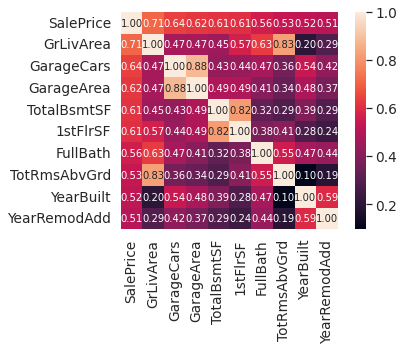

In [12]:
corrmat = df.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Drop the correlated columns

In [13]:
category_features = ['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd',  'ExterQual', 'Foundation',
       'HeatingQC', 'KitchenQual',
         'SaleType', 'SaleCondition', 'GarageType', 'BsmtExposure', 'BsmtFinType1','GarageFinish','BsmtQual','MasVnrType']

numeric_features = ['LotFrontage', 'LotArea',  'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces',  'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'GarageYrBlt','MasVnrArea']

target = ['SalePrice']

In [14]:
print('category feature number = ', len(category_features))
print('numeric feature number = ', len(numeric_features))

category feature number =  23
numeric feature number =  31


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=target), df[target], test_size = 0.2, random_state= 14)

In [17]:
import sklearn
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.utils import check_array
import numpy as np


class RareLabelTransformer(TransformerMixin, BaseEstimator):
    """
    Relabel rare values with a single label for categorical
    features. We use a frequency threshold, so that for each
     feature, the values occurring with a frequency below
    that threshold are replaced with the given label.
    Parameters
    ----------
    threshold : float, 0.01 by default
        Sets the frequency threshold
    label : str, 'rare' by default
        The label to give to the replaced values
    copy : bool, True by default
        Whether to copy from data, inherits from the base classes

    Attributes
    ----------
    rare_labels : list of lists with length [n_features]
        Contains the rare labels for each feature
    """

    def __init__(self, threshold=0.20, label='rare', copy=True):
        self.threshold = threshold
        self.label = label
        self.copy = copy
        self.rare_labels = []

    def fit(self, x, y=None):
        """
        Extracts the rare labels for replacement for each feature
        Parameters
        ----------
        x : array-like of strings
        ----------
        """
        x = check_array(x, dtype='str', ensure_2d=True, copy=self.copy)
        n = x.shape[0]
        rare_labels = []
        for i in range(x.shape[1]):
            uniques, counts = np.unique(x[:, i], return_counts=True)
            rare_labels.append(uniques[counts / n < self.threshold].tolist())
        self.rare_labels = rare_labels
        return self

    def transform(self, x, copy=None):
        """
        Applies the relabelling
        Parameters
        ----------
        x : array-like of strings
        copy : bool, True by default
            Whether to copy from data, inherits from the base classes
        ----------
        """
        copy = copy if copy is not None else self.copy
        x = check_array(x, dtype='str', ensure_2d=True, copy=copy)
        for i in range(x.shape[1]):
            x[:, i] = np.where(np.in1d(x[:, i], self.rare_labels[i]), self.label, x[:, i])
        return x
    
    def fit_transform(self, x, y=None):
        """
        Applies the relabelling
        Parameters
        ----------
        x : array-like of strings
     
        ----------
        """
        return self.fit(x, y).transform(x)


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
numeric_transformer = Pipeline(steps =[('imputer_numeric', SimpleImputer(missing_values=np.nan, strategy='mean')),
                                       ('scaler', StandardScaler())])

In [20]:
category_transformer = Pipeline(steps=[('imputer_category', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
                                       ('rare_labels', RareLabelTransformer(threshold=0.20, label='rare')),
                                    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('category_transformer', category_transformer, category_features),
        ('numeric_transfomer', numeric_transformer, numeric_features)
    ], remainder='drop'
)

In [22]:
import optuna
from sklearn import clone
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from xgboost import XGBRegressor

In [23]:
#pipeline_rf = make_pipeline(clone(preprocessor), SelectKBest(f_regression, k=25), RandomForestRegressor())
pipeline_rf = make_pipeline(clone(preprocessor), RandomForestRegressor())
#pipeline_rf = make_pipeline(clone(preprocessor), XGBRegressor())

In [24]:
def objective(trail):
#     parameter for the random forest regressor    
    params = {
        'randomforestregressor__n_estimators': trail.suggest_int('randomforestregressor__n_estimators', 10, 200, log=True),
        'randomforestregressor__max_depth': trail.suggest_int("randomforestregressor__max_depth", 3, 20, log=True) ,
        'randomforestregressor__max_features': trail.suggest_categorical('randomforestregressor__max_features', ['auto', 'sqrt']),
        'randomforestregressor__min_samples_split': trail.suggest_int("randomforestregressor__min_samples_split", 2, 10, log=True) ,
        'randomforestregressor__min_samples_leaf': trail.suggest_int("randomforestregressor__min_samples_leaf", 1, 4, log=True),
        'randomforestregressor__bootstrap': trail.suggest_categorical('randomforestregressor__bootstrap', [True, False])
    }
    
    #parameter for the xgboost regressor
#     params = {
#         'xgbregressor__n_estimators': trail.suggest_int('xgbregressor__n_estimators', 10, 200, log=True),
#         'xgbregressor__max_depth': trail.suggest_int("xgbregressor__max_depth", 3, 20, log=True) ,
#         'xgbregressor__eta': trail.suggest_float('xgbregressor__eta', 0.1, 0.3, log=True),
#         'xgbregressor__subsample': trail.suggest_float("xgbregressor__subsample", 0.4, 0.8, log=True) ,
#         'xgbregressor__colsample_bytree': trail.suggest_float("xgbregressor__colsample_bytree", 0.4, 0.8, log=True),
#     }
    
    model = pipeline_rf.set_params(**params)
    model.fit(X_train, y_train)
    
    
    score = cross_val_score(model, X_train, y_train, scoring = 'r2', n_jobs = -1, cv = 3).mean()
    
    return score

In [25]:
study_rfr = optuna.create_study(direction = "maximize")
study_rfr.optimize(objective, n_trials = 25)


[I 2022-02-22 02:45:24,140] A new study created in memory with name: no-name-f1f8bbe5-9fcd-41de-b79e-4ddcaa2ac345
/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
[I 2022-02-22 02:45:27,559] Trial 0 finished with value: 0.6838808428118566 and parameters: {'randomforestregressor__n_estimators': 18, 'randomforestregressor__max_depth': 12, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__min_samples_split': 8, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__bootstrap': False}. Best is trial 0 with value: 0.6838808428118566.
/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [26]:
print(study_rfr.best_trial)

FrozenTrial(number=19, values=[0.8448507889427347], datetime_start=datetime.datetime(2022, 2, 22, 2, 46, 15, 663880), datetime_complete=datetime.datetime(2022, 2, 22, 2, 46, 18, 69064), params={'randomforestregressor__n_estimators': 82, 'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__min_samples_split': 5, 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__bootstrap': True}, distributions={'randomforestregressor__n_estimators': IntLogUniformDistribution(high=200, low=10, step=1), 'randomforestregressor__max_depth': IntLogUniformDistribution(high=20, low=3, step=1), 'randomforestregressor__max_features': CategoricalDistribution(choices=('auto', 'sqrt')), 'randomforestregressor__min_samples_split': IntLogUniformDistribution(high=10, low=2, step=1), 'randomforestregressor__min_samples_leaf': IntLogUniformDistribution(high=4, low=1, step=1), 'randomforestregressor__bootstrap': CategoricalDistribution(choices=

In [27]:
print(study_rfr.best_params)

{'randomforestregressor__n_estimators': 82, 'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__min_samples_split': 5, 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__bootstrap': True}


In [28]:
print(study_rfr.best_value)

0.8448507889427347


In [29]:
pipeline_rf.set_params(**study_rfr.best_params)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('category_transformer',
                                                  Pipeline(steps=[('imputer_category',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('rare_labels',
                                                                   RareLabelTransformer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSZoning', 'LotShape',
                                                   'LotConfig', 'Neighborhood',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', '...
                            

In [30]:
pipeline_rf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('category_transformer',
                                                  Pipeline(steps=[('imputer_category',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('rare_labels',
                                                                   RareLabelTransformer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSZoning', 'LotShape',
                                                   'LotConfig', 'Neighborhood',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', '...
                            

In [31]:
from sklearn.metrics import r2_score

In [32]:
y_train_pred = pipeline_rf.predict(X_train)
y_test_pred = pipeline_rf.predict(X_test)

In [33]:
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.9522883468291886
0.8323042763711997


In [34]:
from sklearn import set_config
set_config(display="diagram")
pipeline_rf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('category_transformer',
                                                  Pipeline(steps=[('imputer_category',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('rare_labels',
                                                                   RareLabelTransformer()),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['MSZoning', 'LotShape',
                                                   'LotConfig', 'Neighborhood',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', '...
                                                   'BsmtHalfBath', 'FullBath',
                                                   'HalfBath', 'BedroomAbvGr',
                                                   'KitchenAbvGr',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'GarageCars', 'GarageArea',
                                                   'WoodDeckSF', 'OpenPorchSF',
                                                   'EnclosedPorch', '3SsnPorch',
                                                   'ScreenPorch', 'PoolArea',
                                                   'MiscVal', 'MoSold',
                                                   'YrSold', 'GarageYrBlt', ...])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=3,
                                       min_samples_split=5, n_estimators=82))])

In [35]:
pipeline_rf.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('category_transformer',
                                    Pipeline(steps=[('imputer_category',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('rare_labels',
                                                     RareLabelTransformer()),
                                                    ('onehot',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['MSZoning', 'LotShape', 'LotConfig',
                                     'Neighborhood', 'BldgType', 'HouseStyle',
                                     'OverallQual', 'OverallCond', 'RoofStyle',
                                     'Exterior1st...
                                     'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                     '1stFlrSF', '2n

In [36]:
#pipeline_rf.get_params()['xgbregressor'].feature_importances_


In [37]:
#pipeline_rf.get_params()['xgbregressor'].n_features_in_

In [38]:
preprocessor.get_feature_names

<bound method ColumnTransformer.get_feature_names of ColumnTransformer(transformers=[('category_transformer',
                                 Pipeline(steps=[('imputer_category',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('rare_labels',
                                                  RareLabelTransformer()),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['MSZoning', 'LotShape', 'LotConfig',
                                  'Neighborhood', 'BldgType', 'HouseStyle',
                                  'OverallQual', 'OverallCond', 'RoofStyle',
                                  'Exterior1st...
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
           